In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
class RunnerResults:
    def __init__(self, line):
        fields = line.split(',')
        self.name = fields[0]
        self.cores = int(fields[1])
        self.min_threads = int(fields[2])
        self.max_threads = int(fields[3])
        self.n = int(fields[4])
        self.inserts = float(fields[5])
        self.removals = float(fields[6])
        self.lookups = float(fields[7])
        self.scaling_mode = fields[8]
        self.with_affinity = True if fields[9] == 'true' else False
        self.preload = float(fields[10])
        length = len(fields)
        self.run_times = []
        for t in fields[11:]:
            self.run_times.append(float(t))
 

def get_results(data_path):
    file_names = [fname for fname in os.listdir(data_path) if fname[0] != '.']
    results_list = []
    for fname in file_names:
        results = {}
        for line in open(os.path.join(data_path, fname), 'r').readlines():
            line = line.strip()
            if not len(line) or line.startswith(('#', 'list')):
                continue
            rr = RunnerResults(line)
            results[rr.name] = rr
        results_list.append(results)
    return results_list
                

In [50]:
results = get_results('../../data')
print(results[0].keys())
print(results[0]['DlListMap'].run_times)
print(results[0]['FineGrainListMap'].run_times)

dict_keys(['DlList', 'CoarseGrainList', 'FineGrainList', 'NonBlockingList', 'LockFreeList', 'DlListMap', 'CoarseGrainListMap', 'FineGrainListMap', 'NonBlockingListMap', 'LockFreeListMap'])
[0.0362462]
[0.0427355, 0.0330044, 0.0234364, 0.0191462, 0.0166064, 0.0158418, 0.0150419, 0.0143272, 0.0141474, 0.0139604, 0.01385, 0.0137825, 0.0133446, 0.0130272, 0.012756, 0.0124914, 0.0119829, 0.011703, 0.0115289, 0.0111937, 0.0112129, 0.0109522, 0.010753, 0.0123781]


In [51]:
def get_list_speedup(results_dict):
    base_time = results_dict['DlList'].run_times[0]
    speedup_info = []
    for list_type in ('CoarseGrainList', 'FineGrainList', 'NonBlockingList', 'LockFreeList'):
        speedup_times = [base_time/rt for rt in results_dict[list_type].run_times]
        speedup_info.append((list_type, speedup_times))
    return speedup_info

In [52]:
speedup_times = get_list_speedup(results[0])
print(speedup_times)

[('CoarseGrainList', [1.0093933527074601, 1.060937426982569, 0.962803752009592, 0.9582669823375247, 0.9313321847053471, 0.8673242224807681, 0.8503083109463153, 0.8441859600374543, 0.837313708068599, 0.8298376431338929, 0.8248546703659664, 0.8053617037744123, 0.806766640391797, 0.773562346090108, 0.801515521092767, 0.7767479184226977, 0.7585250656825672, 0.7845985158375589, 0.7715810222947254, 0.7578207264043018, 0.738791642137213, 0.7687309150906224, 0.7620269618762243, 0.762811368877621]), ('FineGrainList', [0.297877086176131, 0.26613801327636866, 0.3921126220970307, 0.4902069707367247, 0.60711325043455, 0.6967802237660778, 0.7968913537385444, 0.9029093919815464, 0.9915194009584346, 1.0788115202018238, 1.1113519142365083, 1.1100477830870097, 0.9745868212062673, 1.0412700398190422, 1.0445015119639636, 1.0303366614407128, 1.095723863177662, 1.145280526841975, 1.2480908781960298, 1.2455697591485158, 1.3537058016814738, 1.3784760937482752, 1.4718401169301127, 1.5436962219365045]), ('NonBl

In [55]:
color_map = {'CoarseGrainList': 'b-', 'FineGrainList': 'g-', 'NonBlockingList': 'y-', 'LockFreeList': 'm-'}

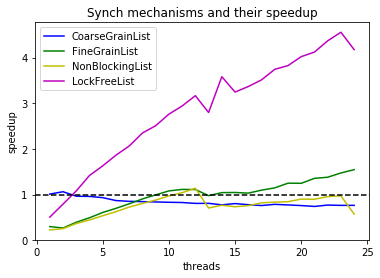

In [59]:
thread_counts = range(1, len(speedup_times[0][1])+1)
for name, st in speedup_times:
    plt.plot(thread_counts,st, color_map[name], label=name)
plt.title('Synch mechanisms and their speedup')
plt.ylabel('speedup')
plt.xlabel('threads')
plt.legend(loc='best')
plt.axhline(y=1, color='k', linestyle='--')
plt.show()